1. Which features are most indicative of the best (or worst) restaurant grade? Are restaraunt inspections subject to bias? If so, what type?

In [84]:
from IPython.core.display import HTML
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import bokeh
from sodapy import Socrata

%matplotlib inline

In [85]:
# Get the API key & API secret for scraping data later.
API_KEY = "SMS4gIwo5XyQg5KaKbshsxAUu" 
API_SECRET = "geJ70vXMQsPO4fyLmhOUfMyQ8WoSFUiJwv5R"

In [86]:
 #Use API-json path provide to scrape the data
app_token = "tXqsoXOEK86GxIPXPV8tJkDuQ"
client = Socrata('data.cityofnewyork.us',
                app_token)

Socrata('data.cityofnewyork.us',
                app_token)  

results = client.get("43nn-pn8j", limit=382_000)


In [87]:
results_df = pd.DataFrame(results)

In [88]:
# Use json to scape the first 1000 data
# json = request.json()
# results_df = pd.DataFrame.from_records(json)
# results_df.head()

In [90]:
results_df.head()

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,5,MORRIS PARK AVE,08C,Pesticide use not in accordance with label or ...,10462
1,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,5,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
2,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,7,MORRIS PARK AVE,06D,"Food contact surface not properly washed, rins...",10462
3,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,7,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
4,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2016-02-18T00:00:00.000,2016-02-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,10,MORRIS PARK AVE,04L,Evidence of mice or live mice present in facil...,10462


In [91]:
results_df.shape

(381912, 18)

In [92]:
# Check the data type 
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381912 entries, 0 to 381911
Data columns (total 18 columns):
action                   380609 non-null object
boro                     381912 non-null object
building                 381689 non-null object
camis                    381912 non-null object
critical_flag            381912 non-null object
cuisine_description      381912 non-null object
dba                      381403 non-null object
grade                    192351 non-null object
grade_date               189820 non-null object
inspection_date          381912 non-null object
inspection_type          380609 non-null object
phone                    381903 non-null object
record_date              381912 non-null object
score                    363727 non-null object
street                   381912 non-null object
violation_code           376126 non-null object
violation_description    373524 non-null object
zipcode                  376362 non-null object
dtypes: object(18)
memory

In [93]:
results_df.isna().sum()

action                     1303
boro                          0
building                    223
camis                         0
critical_flag                 0
cuisine_description           0
dba                         509
grade                    189561
grade_date               192092
inspection_date               0
inspection_type            1303
phone                         9
record_date                   0
score                     18185
street                        0
violation_code             5786
violation_description      8388
zipcode                    5550
dtype: int64

In [123]:
all_df = results_df

In [124]:
all_df.tail(2)

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
381910,NaN,BRONX,686,50091876,Not Applicable,Other,NaN,NaN,NaN,1900-01-01T00:00:00.000,NaN,2035360660,2019-04-29T06:00:58.000,NaN,NEREID AVE,NaN,NaN,10470
381911,NaN,MANHATTAN,63,50091881,Not Applicable,Other,NaN,NaN,NaN,1900-01-01T00:00:00.000,NaN,3472614537,2019-04-29T06:00:58.000,NaN,BAYARD ST,NaN,NaN,10013


In [125]:
all_df.shape

(381912, 18)

In [126]:
all_df.head(30)

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,5,MORRIS PARK AVE,08C,Pesticide use not in accordance with label or ...,10462
1,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,5,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
2,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,7,MORRIS PARK AVE,06D,"Food contact surface not properly washed, rins...",10462
3,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,7,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
4,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2016-02-18T00:00:00.000,2016-02-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,10,MORRIS PARK AVE,04L,Evidence of mice or live mice present in facil...,10462
5,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2016-02-18T00:00:00.000,2016-02-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,10,MORRIS PARK AVE,08A,Facility not vermin proof. Harborage or condit...,10462
6,Violations were cited in the following area(s).,BROOKLYN,469,30112340,Critical,Hamburgers,WENDY'S,A,2019-03-04T00:00:00.000,2019-03-04T00:00:00.000,Cycle Inspection / Initial Inspection,7182875005,2019-04-29T06:00:53.000,13,FLATBUSH AVENUE,02G,Cold food item held above 41Âº F (smoked fish ...,11225
7,Violations were cited in the following area(s).,BROOKLYN,469,30112340,Not Critical,Hamburgers,WENDY'S,A,2019-03-04T00:00:00.000,2019-03-04T00:00:00.000,Cycle Inspection / Initial Inspection,7182875005,2019-04-29T06:00:53.000,13,FLATBUSH AVENUE,10B,Plumbing not properly installed or maintained;...,11225
8,Violations were cited in the following area(s).,BROOKLYN,469,30112340,Not Critical,Hamburgers,WENDY'S,A,2019-03-04T00:00:00.000,2019-03-04T00:00:00.000,Cycle Inspection / Initial Inspection,7182875005,2019-04-29T06:00:53.000,13,FLATBUSH AVENUE,10F,Non-food contact surface improperly constructe...,11225
9,Violations were cited in the following area(s).,BROOKLYN,469,30112340,Critical,Hamburgers,WENDY'S,A,2018-03-13T00:00:00.000,2018-03-13T00:00:00.000,Cycle Inspection / Initial Inspection,7182875005,2019-04-29T06:00:53.000,12,FLATBUSH AVENUE,04L,Evidence of mice or live mice present in facil...,11225


In [127]:
all_df.isnull().sum()

action                     1303
boro                          0
building                    223
camis                         0
critical_flag                 0
cuisine_description           0
dba                         509
grade                    189561
grade_date               192092
inspection_date               0
inspection_type            1303
phone                         9
record_date                   0
score                     18185
street                        0
violation_code             5786
violation_description      8388
zipcode                    5550
dtype: int64

In [128]:
len(all_df['violation_description'].unique())

92

In [129]:
all_df['inspection_type'].value_counts()

Cycle Inspection / Initial Inspection                          223427
Cycle Inspection / Re-inspection                                89758
Pre-permit (Operational) / Initial Inspection                   26860
Pre-permit (Operational) / Re-inspection                        11511
Administrative Miscellaneous / Initial Inspection                7014
Cycle Inspection / Reopening Inspection                          4258
Pre-permit (Non-operational) / Initial Inspection                3482
Smoke-Free Air Act / Initial Inspection                          2830
Administrative Miscellaneous / Re-inspection                     2120
Trans Fat / Initial Inspection                                   1922
Pre-permit (Operational) / Compliance Inspection                 1172
Calorie Posting / Initial Inspection                             1138
Pre-permit (Operational) / Reopening Inspection                   974
Inter-Agency Task Force / Initial Inspection                      959
Cycle Inspection / C

In [130]:
# Check the cuisine type counts
all_df['cuisine_description'].value_counts()

American                                                            82370
Chinese                                                             39701
CafÃ©/Coffee/Tea                                                    18019
Pizza                                                               16984
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16560
Italian                                                             15714
Mexican                                                             15081
Japanese                                                            13608
Caribbean                                                           13380
Bakery                                                              11604
Spanish                                                             11501
Pizza/Italian                                                        8377
Chicken                                                              6828
Indian                                

## Missing value
When action was missing, the grade, grade date, score, violation, critial flag, and inspection were also missing, which make the data uninformative.  Since the GRADE and GRADE DATE

In [131]:
all_df.columns

Index(['action', 'boro', 'building', 'camis', 'critical_flag',
       'cuisine_description', 'dba', 'grade', 'grade_date', 'inspection_date',
       'inspection_type', 'phone', 'record_date', 'score', 'street',
       'violation_code', 'violation_description', 'zipcode'],
      dtype='object')

In [132]:
# Use dummy columns to separate grade 
all_df_dummy = pd.get_dummies(all_df, columns = ['grade', 'boro'])
all_df_dummy.head(2)

,action,building,camis,critical_flag,cuisine_description,dba,grade_date,inspection_date,inspection_type,phone,...,grade_G,grade_Not Yet Graded,grade_P,grade_Z,boro_BRONX,boro_BROOKLYN,boro_MANHATTAN,boro_Missing,boro_QUEENS,boro_STATEN ISLAND
0,Violations were cited in the following area(s).,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0
1,Violations were cited in the following area(s).,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0


In [133]:
# remove the action column's null value
all_df = all_df[all_df['action'].notna()]

In [109]:
all_df.score.value_counts().head()

12    39737
13    30385
10    22280
11    20865
9     18785
Name: score, dtype: int64

In [134]:
# the grade G is quick odd, let's take a look
mask_g = all_df_dummy['grade_G'] == 1
all_df_dummy[mask_g]

,action,building,camis,critical_flag,cuisine_description,dba,grade_date,inspection_date,inspection_type,phone,...,grade_G,grade_Not Yet Graded,grade_P,grade_Z,boro_BRONX,boro_BROOKLYN,boro_MANHATTAN,boro_Missing,boro_QUEENS,boro_STATEN ISLAND
112218,Establishment re-opened by DOHMH,764,41436524,Critical,CafÃ©/Coffee/Tea,THE BREUKELEN COFFEE HOUSE,2018-09-26T00:00:00.000,2018-09-26T00:00:00.000,Cycle Inspection / Reopening Inspection,7187897070,...,1,0,0,0,0,1,0,0,0,0
112219,Establishment re-opened by DOHMH,764,41436524,Not Critical,CafÃ©/Coffee/Tea,THE BREUKELEN COFFEE HOUSE,2018-09-26T00:00:00.000,2018-09-26T00:00:00.000,Cycle Inspection / Reopening Inspection,7187897070,...,1,0,0,0,0,1,0,0,0,0
369812,Violations were cited in the following area(s).,109,50080075,Critical,American,A Summer Day Cafe,2018-09-22T00:00:00.000,2018-09-22T00:00:00.000,Pre-permit (Operational) / Initial Inspection,6464227495,...,1,0,0,0,0,0,1,0,0,0
369813,Violations were cited in the following area(s).,109,50080075,Critical,American,A Summer Day Cafe,2018-09-22T00:00:00.000,2018-09-22T00:00:00.000,Pre-permit (Operational) / Initial Inspection,6464227495,...,1,0,0,0,0,0,1,0,0,0
369814,Violations were cited in the following area(s).,109,50080075,Not Critical,American,A Summer Day Cafe,2018-09-22T00:00:00.000,2018-09-22T00:00:00.000,Pre-permit (Operational) / Initial Inspection,6464227495,...,1,0,0,0,0,0,1,0,0,0


In [135]:
# Since there are only 5 Grade G over 318906 other Grade data
# I will drop the rows
all_df_dummy = all_df_dummy.drop(index = [112218,112219,369812,369813,369814])

In [136]:
all_df_dummy.head(2)

,action,building,camis,critical_flag,cuisine_description,dba,grade_date,inspection_date,inspection_type,phone,...,grade_G,grade_Not Yet Graded,grade_P,grade_Z,boro_BRONX,boro_BROOKLYN,boro_MANHATTAN,boro_Missing,boro_QUEENS,boro_STATEN ISLAND
0,Violations were cited in the following area(s).,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0
1,Violations were cited in the following area(s).,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0


In [137]:
all_df_dummy.columns

Index(['action', 'building', 'camis', 'critical_flag', 'cuisine_description',
       'dba', 'grade_date', 'inspection_date', 'inspection_type', 'phone',
       'record_date', 'score', 'street', 'violation_code',
       'violation_description', 'zipcode', 'grade_A', 'grade_B', 'grade_C',
       'grade_G', 'grade_Not Yet Graded', 'grade_P', 'grade_Z', 'boro_BRONX',
       'boro_BROOKLYN', 'boro_MANHATTAN', 'boro_Missing', 'boro_QUEENS',
       'boro_STATEN ISLAND'],
      dtype='object')

In [138]:
# Check all the Grade G are remove
all_df_dummy[mask_g]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,action,building,camis,critical_flag,cuisine_description,dba,grade_date,inspection_date,inspection_type,phone,...,grade_G,grade_Not Yet Graded,grade_P,grade_Z,boro_BRONX,boro_BROOKLYN,boro_MANHATTAN,boro_Missing,boro_QUEENS,boro_STATEN ISLAND


In [139]:
# Then drop Grade_G
all_df_dummy = all_df_dummy.drop(columns = 'grade_G')

In [140]:
# See the unique restaurants number 
len(all_df_dummy['camis'].unique())

26980

In [141]:
all_df_dummy.head()

,action,building,camis,critical_flag,cuisine_description,dba,grade_date,inspection_date,inspection_type,phone,...,grade_C,grade_Not Yet Graded,grade_P,grade_Z,boro_BRONX,boro_BROOKLYN,boro_MANHATTAN,boro_Missing,boro_QUEENS,boro_STATEN ISLAND
0,Violations were cited in the following area(s).,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0
1,Violations were cited in the following area(s).,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0
2,Violations were cited in the following area(s).,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0
3,Violations were cited in the following area(s).,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0
4,Violations were cited in the following area(s).,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,2016-02-18T00:00:00.000,2016-02-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,...,0,0,0,0,1,0,0,0,0,0


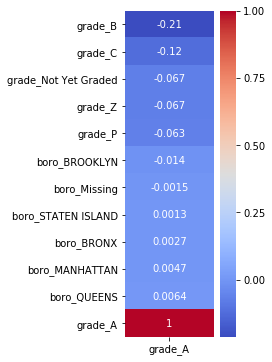

In [144]:
# Plot heatmap to see which feature is more related to the Grade
plt.figure(figsize =(2,6))
sns.heatmap(all_df_dummy.corr()[['grade_A']].sort_values('grade_A'), cmap = 'coolwarm', annot = True)


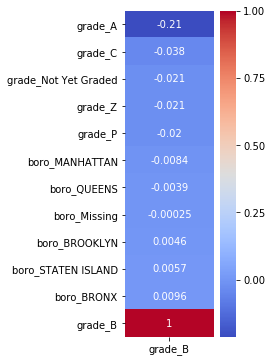

In [145]:

# Plot heatmap to see which feature is more related to the Grade
plt.figure(figsize =(2,6))
sns.heatmap(all_df_dummy.corr()[['grade_B']].sort_values('grade_B'), cmap = 'coolwarm', annot = True)


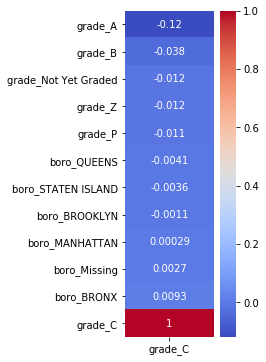

In [146]:
# Plot heatmap to see which feature is more related to the Grade
plt.figure(figsize =(2,6))
sns.heatmap(all_df_dummy.corr()[['grade_C']].sort_values('grade_C'), cmap = 'coolwarm', annot = True)


In [151]:
def boro_pie_plot(boro_name):
    mask_boro = all_df_dummy[boro_name] ==1
    boro_df = all_df_dummy[mask_boro]
    # See the precentage of Grade A, B, C, P, Z, and not yet graded
    boro_df[['grade_A','grade_B','grade_C','grade_P',
          'grade_Z','grade_Not Yet Graded']].sum().plot(kind = 'bar');

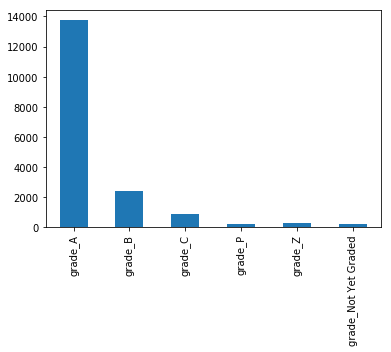

In [152]:
boro_pie_plot('boro_BRONX')

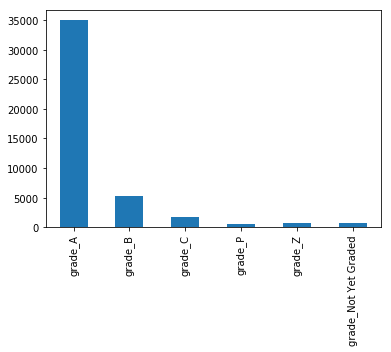

In [153]:
boro_pie_plot('boro_QUEENS')

In [154]:
df2 = all_df.dropna(subset=['action'])
df2 = df2.fillna({'score':0})

In [155]:
df2.head()

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,5,MORRIS PARK AVE,08C,Pesticide use not in accordance with label or ...,10462
1,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,5,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
2,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,7,MORRIS PARK AVE,06D,"Food contact surface not properly washed, rins...",10462
3,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,7,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
4,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2016-02-18T00:00:00.000,2016-02-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-04-29T06:00:53.000,10,MORRIS PARK AVE,04L,Evidence of mice or live mice present in facil...,10462


In [156]:
# I want to know if the score is related to critical flag,
# so I am dummy the column
table = pd.pivot_table(df2, values='score',
                       index=['critical_flag','cuisine_description'],
                       columns=['boro'], aggfunc=np.sum)

In [157]:
table

boro                                                                                                                BRONX  \
critical_flag cuisine_description                                                                                           
Critical      Afghan                                             score                                                NaN   
              African                                            score                                                inf   
              American                                           score                                                inf   
              Armenian                                           score                                              13711   
              Asian                                              score                                       7.17172e+108   
              Australian                                         score                                                NaN   
              Bagels/Pretzels                                    score                                        1.39242e+66   
              Bakery                                             score                                                inf   
              Bangladeshi                                        score                                       3.73737e+140   
              Barbecue                                           score                                        2.62626e+65   
              Basque                                             score                                                NaN   
              Bottled beverages, including water, sodas, juic... score                                        1.32323e+90   
              Brazilian                                          score                                                NaN   
              CafÃ©/Coffee/Tea                                   score                                                inf   
              Cajun                                              score                                                NaN   
              Californian                                        score                                                NaN   
              Caribbean                                          score                                                inf   
              Chicken                                            score  1199121218181151818121211303030972121212111101...   
              Chilean                                            score                                                NaN   
              Chinese                                            score                                                inf   
              Chinese/Cuban                                      score                                        5.55556e+52   
              Chinese/Japanese                                   score                                                NaN   
              Continental                                        score                                                NaN   
              Creole                                             score                                                NaN   
              Creole/Cajun                                       score                                                NaN   
              Czech                                              score                                                NaN   
              Delicatessen                                       score                                                inf   
              Donuts                                             score                                                inf   
              Eastern European                                   score                                        1.01029e+79   
              Egyptian                                           score                                                NaN   


In [158]:
df2['critical_flag'].value_counts()

Critical          208533
Not Critical      164991
Not Applicable      7085
Name: critical_flag, dtype: int64

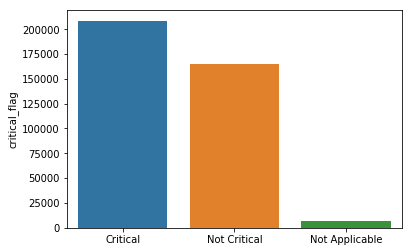

In [159]:
sns.barplot(df2['critical_flag'].value_counts().index,
            df2['critical_flag'].value_counts());


In [160]:
table_boro = pd.pivot_table(df2, values='score',
                       index=['critical_flag'],
                       columns=['boro'], aggfunc=np.sum)

In [161]:
table_boro

,boro,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
critical_flag,,,,,,,
Critical,score,7101212513131210725251818181818181312122222222...,1312107114848481310138131311131010121013139191...,1210131310812711121221211338222222121010232338...,8.12414e+165,4040101025252020111111132424248718181821212158...,1271212924242410181811540409121919121214148122...


In [162]:
def get_google_latlong(address, api_key=None, return_full_response=False):
    # Set up your Geocoding url
    geocode_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}".format(address)
    if api_key is not None:
        geocode_url = geocode_url + "&key={}".format(api_key)
        
    # Ping google for the reuslts:
    results = requests.get(geocode_url)
    # Results will be in JSON format - convert to dict using requests functionality
    results = results.json()
    
    # if there's no results or an error, return empty results.
    if len(results['results']) == 0:
        output = {
            "latitude": None,
            "longitude": None
        }
    else:    
        answer = results['results'][0]
        output = {
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng')
        }
        
    # Append some other details:    
    output['input_string'] = address
    output['number_of_results'] = len(results['results'])
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output